# L1 and L2 Regularization

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
#dataset = pd.read_csv('./Melbourne_housing_FULL.csv')

dataset = pd.read_csv('Melbourne_housing_FULL.csv')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [63]:
dataset.shape

(34857, 21)

In [64]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [65]:
dataset.nunique()

Suburb            351
Rooms              12
Type                3
Method              9
SellerG           388
Regionname          8
Propertycount     342
Distance          215
CouncilArea        33
Bedroom2           15
Bathroom           11
Car                15
Landsize         1684
BuildingArea      740
Price            2871
dtype: int64

<AxesSubplot:>

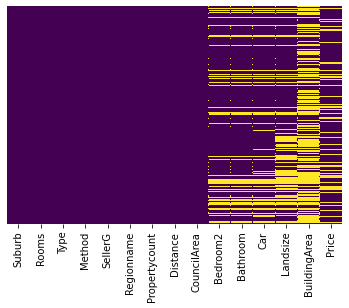

In [66]:
sns.heatmap(dataset.isnull(),yticklabels = False , cbar = False , cmap = 'viridis')

In [67]:
#dataset.corr()['Suburb'].sort_values().plot.barh()

In [68]:
dataset.shape

(34857, 15)

In [69]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [70]:
#print(dataset['CouncilArea'])

In [74]:
cols_to_fill_zero = ['Price','Distance', 'Bedroom2', 'Bathroom', 'Car','Regionname','Propertycount', 'BuildingArea', 'CouncilArea' ]
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

In [75]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea         0
Price                0
dtype: int64

In [76]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())

In [77]:
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

<AxesSubplot:>

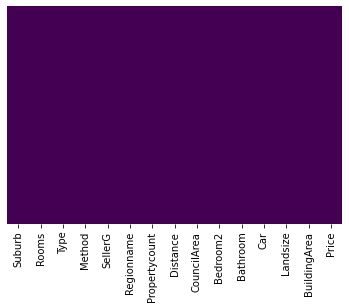

In [78]:
sns.heatmap(dataset.isnull(),yticklabels = False , cbar = False , cmap = 'viridis')

In [79]:
# dataset.dropna(inplace=True)
# eta diye chaile data drop kora possible.

# One Hot Encoding

In [80]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,2,4019.0,2.5,2.0,1.0,1.0,126.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,0.0,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,4019.0,2.5,3.0,2.0,1.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [93]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

#  Linear Regression Model

In [94]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [95]:
reg.score(test_X, test_y)

0.290294610798687

In [96]:
reg.score(train_X, train_y)

0.3324060655961064

# L1 Regularized

In [97]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [98]:
lasso_reg.score(test_X, test_y)

0.29580829364604

In [99]:
lasso_reg.score(train_X, train_y)

0.32743523663240115

# L2 Regularized

In [100]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [101]:
ridge_reg.score(test_X, test_y)

0.29523034123063363

In [102]:
ridge_reg.score(train_X, train_y)

0.32100332912987717